## Notebook version of ``load_in_pytorch.py``

This notebook is a copy of ``load_in_pytorch.py``, created to check for jupyter issues

If you see this error:

    IProgress not found. Please update jupyter and ipywidgets.
    See https://ipywidgets.readthedocs.io/en/stable/user_install.html
    
Please follow those instructions. The command you want is probably

    pip install ipywidgets

Followed by restarting Jupyter (or at least the kernel).

In [24]:
import pandas as pd

from galaxy_mnist import GalaxyMNIST


In [25]:

dataset = GalaxyMNIST(
    root='/home/walml/repos/galaxy_mnist/download_root',
    download=True,
    train=True  # by default, or False for canonical test set
)


  0%|          | 0/68681710 [00:00<?, ?it/s]

Extracting /home/walml/repos/galaxy_mnist/download_root/GalaxyMNIST/raw/train_dataset.hdf5.gz to /home/walml/repos/galaxy_mnist/download_root/GalaxyMNIST/raw



  0%|          | 0/17251325 [00:00<?, ?it/s]

Extracting /home/walml/repos/galaxy_mnist/download_root/GalaxyMNIST/raw/test_dataset.hdf5.gz to /home/walml/repos/galaxy_mnist/download_root/GalaxyMNIST/raw



In [26]:

# this is always the canonical 80/20 train/test split
images = dataset.data
labels = dataset.targets


print(images.shape, images.dtype)
print(labels.shape, labels.dtype)



torch.Size([8000, 3, 64, 64]) torch.uint8
torch.Size([8000]) torch.int64


In [27]:
# however, you can set your own split size and stratification if you like
(custom_train_images, custom_train_labels), (custom_test_images, custom_test_labels) = dataset.load_custom_data(test_size=0.8, stratify=True) 

In [28]:
print(custom_train_images.shape, custom_test_images.shape)
print(pd.value_counts(custom_train_labels.numpy()), pd.value_counts(custom_test_labels.numpy()))


torch.Size([2000, 3, 64, 64]) torch.Size([8000, 3, 64, 64])
1    500
2    500
0    500
3    500
dtype: int64 0    2000
3    2000
2    2000
1    2000
dtype: int64


In [29]:

# The values of dataset.data, dataset.targets, and hence __getitem__,
# will be from whichever loading method you last called: either __init__ or load_custom_data
train_image, train_label = dataset[0]
train_label

1

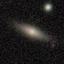

In [30]:
train_image

In [31]:

dataset.train = False
# need to call again to update self.data, self.targets
_= dataset.load_custom_data(test_size=0.8, stratify=True)

In [34]:
# now __getitem__ returns test values
test_image, test_label = dataset[0]
test_label

0

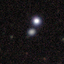

In [33]:
test_image